# Sentiment data GOOG

In [2]:

# Import libraries
from urllib.request import urlopen, Request
import nltk
from bs4 import BeautifulSoup
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from nltk.sentiment.vader import SentimentIntensityAnalyzer

web_archive = 'https://web.archive.org/web/'
finviz_URL = '/https://finviz.com/quote.ashx?t='

archive_index = [
    20211103205550,
    20211028001255,
    20211020235040,
    20211013001925,
    20211004210655,
    20210927201643,
    20210910165744,
    20210903151313,
    20210827131235,
    20210820103106,
    20210811223916,
    20210806083934,
    20210730074732,
    20210729071322,
    20210722061619,
    20210715060938,
    20210714065622,
    20210630060929,
    20210628174620,
    20210623052253,
    20210617155319,
    20210616033143,
    20210614213635,
    20210607201630,
    20210606220201,
    20210530215332,
    20210511142737,
    20210503144821,
    20210426143150,
    20210415011248,
    20210411145442,
    20210330162204,
    20210323151535,
    20210309132931,
    20210223120433,
    20210216114055,
    20210209112521,
    20210202094839,
    20210126182133,
    20210125102612,
    20210124053047,
    20210123234228,
    20210119120020,
    20210111051018,
    #20201231232204,
    #20201224230435,
    #20201217224026,
    #20201210221203,
    #20201203220312,
    #20201129160224,
    #20201127201215,
    #20201126210835,
    #20201123162638,
    #20201119203820,
    
]


news_tables = {}
ticker = 'GOOG'
j=0

for index in archive_index:
    j = j+1
    print('Uploading file %f....' % j)
    print(len(news_tables))
    url = web_archive + str(index) + finviz_URL + ticker
    req = Request(url=url,headers={'user-agent': 'my-app/0.0.1'}) 
    response = urlopen(req)    
    html = BeautifulSoup(response)
    news_table = html.find(id='news-table')
    news_tables[j] = news_table



Uploading file 1.000000....
0
Uploading file 2.000000....
1
Uploading file 3.000000....
2
Uploading file 4.000000....
3
Uploading file 5.000000....
4
Uploading file 6.000000....
5
Uploading file 7.000000....
6
Uploading file 8.000000....
7
Uploading file 9.000000....
8
Uploading file 10.000000....
9
Uploading file 11.000000....
10
Uploading file 12.000000....
11
Uploading file 13.000000....
12
Uploading file 14.000000....
13
Uploading file 15.000000....
14
Uploading file 16.000000....
15
Uploading file 17.000000....
16
Uploading file 18.000000....
17
Uploading file 19.000000....
18
Uploading file 20.000000....
19
Uploading file 21.000000....
20
Uploading file 22.000000....
21
Uploading file 23.000000....
22
Uploading file 24.000000....
23
Uploading file 25.000000....
24
Uploading file 26.000000....
25
Uploading file 27.000000....
26
Uploading file 28.000000....
27
Uploading file 29.000000....
28
Uploading file 30.000000....
29
Uploading file 31.000000....
30
Uploading file 32.000000...

In [3]:
parsed_news = []

for file_name, news_table in news_tables.items():
    for x in news_table.findAll('tr'):
        text = x.a.get_text() 
        date_scrape = x.td.text.split()

        if len(date_scrape) == 1:
            time = date_scrape[0]
            
        else:
            date = date_scrape[0]
            time = date_scrape[1]
        page_index = str(file_name)

        parsed_news.append([page_index, date, time, text])
        
parsed_news[1]

['1', 'Nov-03-21', '01:40PM', 'Why Criteo Stock Is Skyrocketing Today']

In [4]:
vader = SentimentIntensityAnalyzer()
columns = ['page_index', 'date', 'time', 'headline']
parsed_and_scored_news = pd.DataFrame(parsed_news, columns=columns)

scores = parsed_and_scored_news['headline'].apply(vader.polarity_scores).tolist()
scores_df = pd.DataFrame(scores)
parsed_and_scored_news = parsed_and_scored_news.join(scores_df, rsuffix='_right')
parsed_and_scored_news['date'] = pd.to_datetime(parsed_and_scored_news.date).dt.date
parsed_and_scored_news.tail(30)



daily_count = parsed_and_scored_news.value_counts('date')
GOOGSentimentData = parsed_and_scored_news.drop(['time'],axis=1).groupby('date').mean()
print(daily_count)

GOOGSentimentData.set_index(pd.to_datetime(GOOGSentimentData.index, format = '%Y-%m-%d'),inplace=True)
GOOGSentimentData.sort_values(by='date', axis=0,ascending=False,inplace=True)
GOOGSentimentData = pd.concat((GOOGSentimentData,daily_count), axis=1, join='inner')
GOOGSentimentData['Daily References'] = GOOGSentimentData[0]
GOOGSentimentData.drop(0,axis=1,inplace=True)
GOOGSentimentData

date
2021-01-22    128
2021-07-28    104
2021-01-21     94
2021-06-15     85
2021-01-20     69
             ... 
2021-02-02      1
2021-06-20      1
2021-06-30      1
2021-02-16      1
2021-08-22      1
Length: 233, dtype: int64


,neg,neu,pos,compound,Daily References
date,,,,,
2021-11-03,0.000000,0.984700,0.015300,0.020230,10
2021-11-02,0.039923,0.888577,0.071462,0.054227,26
2021-11-01,0.023944,0.875667,0.100389,0.126867,18
2021-10-31,0.096750,0.770250,0.133000,0.081800,4
2021-10-30,0.058600,0.891400,0.050200,0.041260,5
...,...,...,...,...,...
2021-01-08,0.068130,0.891043,0.040826,-0.062987,23
2021-01-07,0.130600,0.834667,0.034733,-0.174553,15
2021-01-06,0.064000,0.809706,0.126294,0.124724,17


In [5]:
GOOGSentimentData.index.value_counts()
GOOGSentimentData.index.min()

datetime.date(2021, 1, 4)

In [6]:
import datetime
from datetime import date
from pandas_datareader.data import DataReader
from yahoofinancials import YahooFinancials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import backtrader as bt
import talib
pd.options.mode.chained_assignment = None

In [7]:
### Import data

def yahooImport(ticker,start,end,period):
    yahoo_financials = YahooFinancials(ticker)
    data = pd.DataFrame(yahoo_financials.get_historical_price_data(start, end, period)[ticker]['prices'])
    data['formatted_date'] = pd.to_datetime(data['formatted_date']).dt.date
    data = data.set_index('formatted_date').drop(columns=['date','adjclose'])
    print(data.shape)
    return data


tick = 'GOOG'
date1 = '2020-11-12'
date2 = '2021-11-08'
data = yahooImport(tick,date1,date2,'daily')
print(data.index.dtype)

print(data.head())

(248, 5)
object
                       high          low         open        close   volume
formatted_date                                                             
2020-11-12      1768.270020  1745.599976  1747.630005  1749.839966  1247500
2020-11-13      1781.040039  1744.550049  1757.630005  1777.020020  1499900
2020-11-16      1799.069946  1767.689941  1771.699951  1781.380005  1246800
2020-11-17      1785.000000  1767.000000  1776.939941  1770.150024  1147100
2020-11-18      1773.469971  1746.140015  1765.229980  1746.780029  1173500


In [8]:
GOOG = pd.concat((data,GOOGSentimentData), axis=1, join='inner')
GOOG.to_csv('GOOG.csv')
GOOG

,high,low,open,close,volume,neg,neu,pos,compound,Daily References
2021-01-04,1760.650024,1707.849976,1757.540039,1728.239990,1901900,0.044812,0.927187,0.028000,-0.022681,16
2021-01-05,1747.670044,1718.015015,1725.000000,1740.920044,1145300,0.030909,0.877091,0.092000,0.120055,11
2021-01-06,1748.000000,1699.000000,1702.630005,1735.290039,2602100,0.064000,0.809706,0.126294,0.124724,17
2021-01-07,1788.400024,1737.050049,1740.060059,1787.250000,2265000,0.130600,0.834667,0.034733,-0.174553,15
2021-01-08,1809.839966,1773.535034,1787.979980,1807.209961,2050600,0.068130,0.891043,0.040826,-0.062987,23
...,...,...,...,...,...,...,...,...,...,...
2021-10-28,2948.489990,2895.270020,2945.979980,2922.580078,1620900,0.044600,0.860600,0.094800,0.084960,5
2021-10-29,2972.260010,2903.330078,2910.399902,2965.409912,1447700,0.035687,0.863469,0.100844,0.118703,32
2021-11-01,2967.989990,2871.590088,2963.300049,2875.479980,1613600,0.023944,0.875667,0.100389,0.126867,18
2021-11-02,2938.409912,2892.820068,2896.187988,2917.260010,1057500,0.039923,0.888577,0.071462,0.054227,26


In [12]:
GOOG['SMA_25'] = talib.SMA(data['close'],25)
GOOG['EMA_25'] = talib.EMA(data['close'],25)
GOOG

,high,low,open,close,volume,neg,neu,pos,compound,Daily References,SMA_25,EMA_25
2020-11-12,1768.270020,1745.599976,1747.630005,1749.839966,1247500,0.000000,0.789000,0.211000,0.295000,2,NaN,NaN
2020-11-13,1781.040039,1744.550049,1757.630005,1777.020020,1499900,0.028375,0.907688,0.064062,0.034369,16,NaN,NaN
2020-11-16,1799.069946,1767.689941,1771.699951,1781.380005,1246800,0.012875,0.960500,0.026625,0.008506,16,NaN,NaN
2020-11-17,1785.000000,1767.000000,1776.939941,1770.150024,1147100,0.069021,0.832468,0.098553,0.031468,47,NaN,NaN
2020-11-18,1773.469971,1746.140015,1765.229980,1746.780029,1173500,0.104944,0.825222,0.069889,-0.023356,36,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-28,2948.489990,2895.270020,2945.979980,2922.580078,1620900,0.044600,0.860600,0.094800,0.084960,5,2791.405205,2818.746880
2021-10-29,2972.260010,2903.330078,2910.399902,2965.409912,1447700,0.035687,0.863469,0.100844,0.118703,32,2795.915205,2830.028652
2021-11-01,2967.989990,2871.590088,2963.300049,2875.479980,1613600,0.023944,0.875667,0.100389,0.126867,18,2797.733604,2833.524908
2021-11-02,2938.409912,2892.820068,2896.187988,2917.260010,1057500,0.039923,0.888577,0.071462,0.054227,26,2805.476807,2839.966070


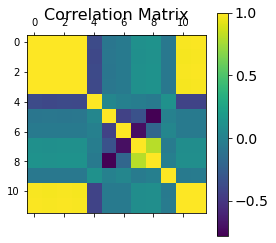

,high,low,open,close,volume,neg,neu,pos,compound,Daily References,SMA_25,EMA_25
high,1.000000,0.998717,0.998802,0.999140,-0.370473,-0.079217,-0.051221,0.115210,0.130441,-0.065369,0.979560,0.986362
low,0.998717,1.000000,0.998993,0.999126,-0.396755,-0.075128,-0.047959,0.108617,0.123818,-0.065595,0.978850,0.985678
open,0.998802,0.998993,1.000000,0.997951,-0.381744,-0.080613,-0.047435,0.112354,0.128750,-0.065630,0.979595,0.986366
close,0.999140,0.999126,0.997951,1.000000,-0.386764,-0.076476,-0.052584,0.114494,0.127813,-0.066856,0.978897,0.985826
volume,-0.370473,-0.396755,-0.381744,-0.386764,1.000000,0.036600,-0.002150,-0.026419,-0.049964,0.121467,-0.419003,-0.418786
neg,-0.079217,-0.075128,-0.080613,-0.076476,0.036600,1.000000,-0.428157,-0.334676,-0.779646,0.003162,-0.044777,-0.051837
neu,-0.051221,-0.047959,-0.047435,-0.052584,-0.002150,-0.428157,1.000000,-0.708296,-0.192718,0.036711,-0.053215,-0.047448
pos,0.115210,0.108617,0.112354,0.114494,-0.026419,-0.334676,-0.708296,1.000000,0.809971,-0.040695,0.090238,0.089686
compound,0.130441,0.123818,0.128750,0.127813,-0.049964,-0.779646,-0.192718,0.809971,1.000000,-0.008240,0.096923,0.099542
Daily References,-0.065369,-0.065595,-0.065630,-0.066856,0.121467,0.003162,0.036711,-0.040695,-0.008240,1.000000,-0.046036,-0.039038


In [13]:
plt.matshow(GOOG.corr())
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.show()
GOOG.corr()

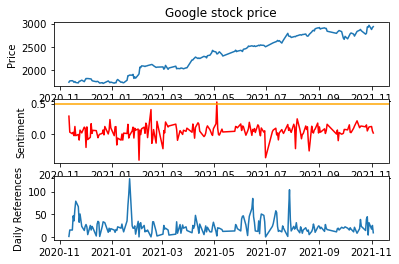

In [15]:
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(3)
# Plot RSI with the price
ax1.set_ylabel('Price')
ax1.plot(GOOG['close'])
ax2.set_ylabel('Sentiment')
ax2.plot(GOOG['compound'], color='red')
ax2.axhline(y=0.5, color='orange')
ax3.set_ylabel('Daily References')
ax3.plot(GOOG['Daily References'])


ax1.set_title('Google stock price')
plt.show()